In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [3]:
## Loading and seeing the dimensions of the dataframe
df = pd.read_csv('NYCTaxiFares.csv')
df.shape

(120000, 8)

In [4]:
# Structure of the dataframe
df.head(10)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
5,2010-04-22 08:39:47 UTC,8.1,0,-73.980481,40.748995,-73.983508,40.766459,1
6,2010-04-23 19:27:00 UTC,4.9,0,-73.959535,40.779582,-73.947185,40.780223,1
7,2010-04-15 09:03:37 UTC,4.9,0,-74.002601,40.739419,-73.997912,40.730292,1
8,2010-04-20 08:58:00 UTC,2.9,0,-74.014005,40.704058,-74.013202,40.702877,1
9,2010-04-16 18:50:16 UTC,6.1,0,-73.977689,40.784175,-73.988639,40.778669,1


In [5]:
## Looking for missing values, if any
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
## Checking if the datatypes are appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [7]:
## Changing datetime column's datatype
df.pickup_datetime = pd.to_datetime(df['pickup_datetime'])

In [8]:
## Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [17]:
## Creating different columns from the datetime one
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19


In [19]:
## Creating a daynight variable, assuming 6PM as sunset and 6AM as Sunrise 
df["daynight"] = df['Hour'].apply(lambda x:1 if 6<=x<=18 else 0)
## 1 for day, 0 for night

In [20]:
## Dropping datetime, because it's been stripped for everything
df.drop('pickup_datetime',1,inplace=True)
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes,daynight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17,1
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43,1
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23,1
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25,0
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19,0


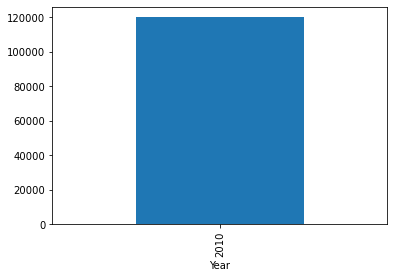

In [23]:
## Visualizing the distribution of year over our data
df.groupby('Year')['fare_amount'].count().plot.bar()
plt.show()

Will be dropping year, cause it's constant

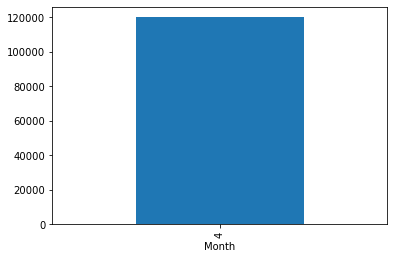

In [25]:
## Visualizing the distribution of months over our data
df.groupby('Month')['fare_amount'].count().plot.bar()
plt.show()

Same for the month column

In [29]:
df.drop(['Year','Month'],1,inplace=True)

In [30]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Hour,Minutes,daynight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,19,8,17,1
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,17,15,43,1
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,17,11,23,1
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,11,21,25,0
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,17,2,19,0


In [34]:
###https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
## Implemented this, in order to calculate distance between points
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [32]:
df['Total_Distance'] = haversine(df)

In [33]:
df.head(10)

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Day,Hour,Minutes,daynight,Total_Distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,19,8,17,1,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,17,15,43,1,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,17,11,23,1,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,11,21,25,0,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,17,2,19,0,7.231321
5,8.1,0,-73.980481,40.748995,-73.983508,40.766459,1,22,8,39,1,1.958574
6,4.9,0,-73.959535,40.779582,-73.947185,40.780223,1,23,19,27,0,1.042304
7,4.9,0,-74.002601,40.739419,-73.997912,40.730292,1,15,9,3,1,1.089064
8,2.9,0,-74.014005,40.704058,-74.013202,40.702877,1,20,8,58,1,0.147740
9,6.1,0,-73.977689,40.784175,-73.988639,40.778669,1,16,18,50,1,1.106731


In [36]:
## Now the purpose of lattitudes and longitudes have been served, dropping them as well..
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],1,inplace=True)

In [37]:
## Final modified dataframe is as follows: -
df.head(10)

,fare_amount,fare_class,passenger_count,Day,Hour,Minutes,daynight,Total_Distance
0,6.5,0,1,19,8,17,1,2.126312
1,6.9,0,1,17,15,43,1,1.392307
2,10.1,1,2,17,11,23,1,3.326763
3,8.9,0,1,11,21,25,0,1.864129
4,19.7,1,1,17,2,19,0,7.231321
5,8.1,0,1,22,8,39,1,1.958574
6,4.9,0,1,23,19,27,0,1.042304
7,4.9,0,1,15,9,3,1,1.089064
8,2.9,0,1,20,8,58,1,0.147740
9,6.1,0,1,16,18,50,1,1.106731


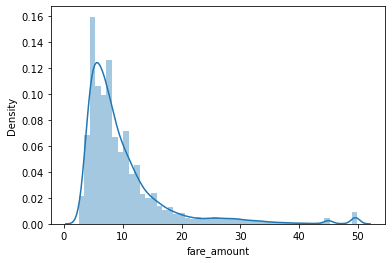

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


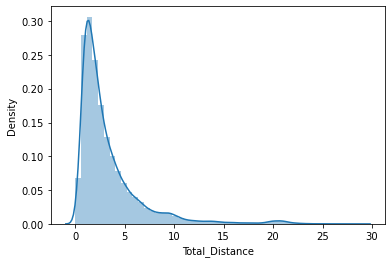

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [38]:
## Checking distribution of 2 columns
for i in ['fare_amount','Total_Distance']:
    sns.distplot(df[i])
    plt.show()
    print("Z"*120)

In [40]:
## X,y Split
X = df.drop('fare_amount',1)
y = df['fare_amount']

## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,train_size=0.7)

In [41]:
X_train.shape,X_test.shape

((84000, 7), (36000, 7))

### Applying a Decision Tree

In [106]:
## Helper Functions
def plt_tree(dt):
    plt.figure(figsize=(60,30))
    plot_tree(dt,feature_names=X_train.columns,rounded=True,filled=True)
    plt.show()
    
def evaluate_model(dt,x,y):
    print("R-Sqaured is",round(metrics.r2_score(y,dt.predict(x)),3))
    print("RMSE is",round(metrics.mean_squared_error(y,dt.predict(x)),4))

In [39]:
dt = DecisionTreeRegressor(random_state=100)

In [43]:
params = {
    'max_depth' : list(range(2,7)),
    'min_samples_leaf' : [10,30,50,100,200]
}

In [44]:
grid = GridSearchCV(estimator=dt,n_jobs=-1,param_grid=params,scoring='r2',verbose=1,cv=5) 

In [45]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

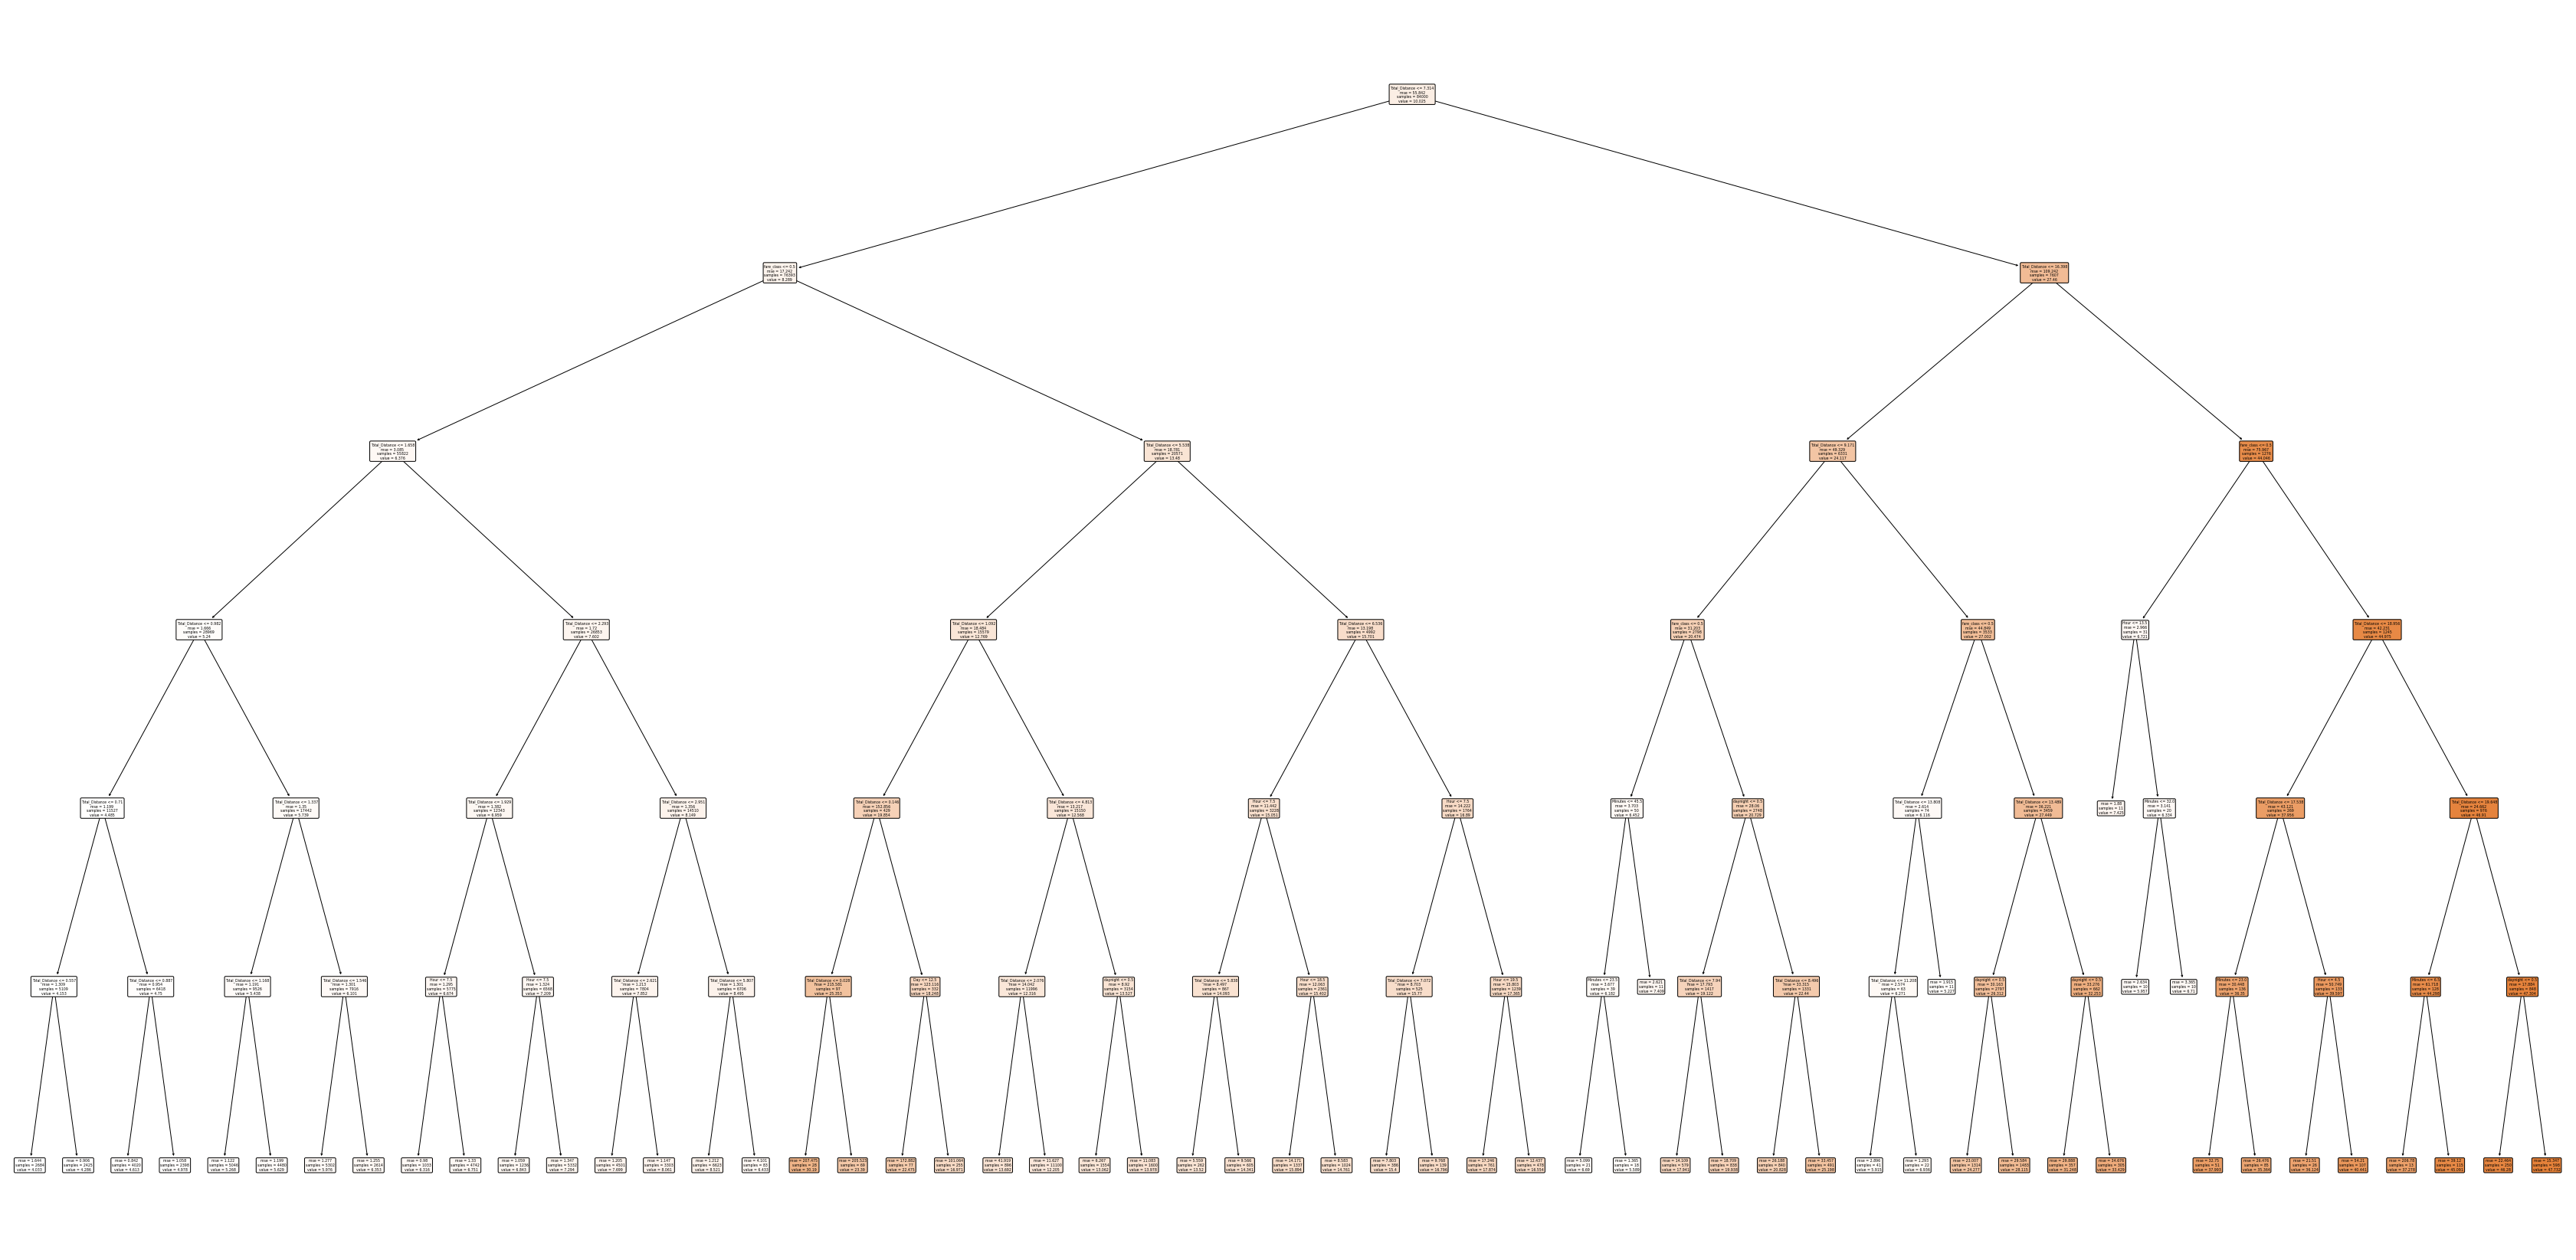

In [51]:
dt_best = grid.best_estimator_
dt_best.fit(X_train,y_train)
plt_tree(dt_best)

In [107]:
## Train set
evaluate_model(dt_best,X_train,y_train)

R-Sqaured is 0.879
RMSE is 6.7724


In [108]:
## Test Set
evaluate_model(dt_best,X_test,y_test)

R-Sqaured is 0.882
RMSE is 6.7643


## This is performing reasonably well, Let's see if random forest can improve

In [80]:
rf = RandomForestRegressor(random_state=100,n_jobs=-1)

In [81]:
## Adding an RF param
params['n_estimators'] = [10,30,50,100,200] 

In [82]:
params

{'max_depth': [2, 3, 4, 5, 6],
 'min_samples_leaf': [10, 30, 50, 100, 200],
 'n_estimators': [10, 30, 50, 100, 200]}

In [83]:
grid2 = GridSearchCV(estimator=rf,param_grid=params,scoring='r2',n_jobs=-1,verbose=1,cv=5)

In [84]:
%%time
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed: 20.8min finished


Wall time: 20min 53s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 30, 50, 100, 200],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [89]:
grid2.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=100)

In [92]:
rf_best = RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=100, oob_score=True)
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, oob_score=True, random_state=100)

In [93]:
pd.DataFrame({'Features':X_train.columns,'Importance':rf_best.feature_importances_}).sort_values('Importance',ascending=False)

,Features,Importance
6,Total_Distance,0.786625
0,fare_class,0.206510
5,daynight,0.004733
3,Hour,0.001091
2,Day,0.000621
4,Minutes,0.000377
1,passenger_count,0.000045


In [109]:
## Train Data
evaluate_model(rf_best,X_train,y_train)

R-Sqaured is 0.88
RMSE is 6.6759


In [110]:
## Test Data
evaluate_model(rf_best,X_test,y_test)

R-Sqaured is 0.884
RMSE is 6.6573


### Almost similar predictions

In [98]:
dt_best

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, random_state=100)

In [99]:
est = [('dt',DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, random_state=100)),('rf',RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_estimators=200,
                      n_jobs=-1, random_state=100))]

In [103]:
st = StackingRegressor(estimators=est, final_estimator=LinearRegression())
st.fit(X_train,y_train)

StackingRegressor(estimators=[('dt',
                               DecisionTreeRegressor(max_depth=6,
                                                     min_samples_leaf=10,
                                                     random_state=100)),
                              ('rf',
                               RandomForestRegressor(max_depth=6,
                                                     min_samples_leaf=10,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=100))],
                  final_estimator=LinearRegression())

In [111]:
## Train set
evaluate_model(st,X_train,y_train)

R-Sqaured is 0.88
RMSE is 6.6796


In [112]:
## Test Set
evaluate_model(st,X_test,y_test)

R-Sqaured is 0.884
RMSE is 6.6587


In [114]:
pd.DataFrame({'Model':["DecisionTree",'RandomForest'],'Coefficients':(st.final_estimator_).coef_})

,Model,Coefficients
0,DecisionTree,-0.308862
1,RandomForest,1.309738


## The stacking algorithm proves that Decision Tree can't compare to our cross-validated Random Forests